**Module 5 Assignment - 1**
By Group 2: Jyothi K Vishwanath, Praveen Maranur, Dheeraj Singh and Niyanta Pandey

# **Introduction**
In this assignment, we aim to evaluate the performance of a binary classification model using a combination of custom Python functions and pre-built functions from the `scikit-learn` library. The dataset provided contains approximately 180 observations, each with a binary classification (`0` or `1`). Our tasks include calculating various performance metrics such as accuracy, precision, recall, specificity, F1 score, and the Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve.




We will perform the following steps:
1. Read dataset from github repository. 
2. Load dataset into pandas dataframe. 
3. Create confusion matrix sing crosstab function in pandas. 
4. Extract True Positive, False Positive, True Negative and False Negative metrics from confusion  matrix.  
5. Calculate Accuracy using User defined function. 
6. Calculate Precision using User defined function. 
7. Calculate Sensitivity(Recall) using User defined function. 
8. Calculate Specificity using User definned function. 
9. Calculate F1 Score using User defined function. 
10. ROC Curve and AUC calculation using user defined function. 
11. Invoking/Calling User defined functions.
12. Comparison of metrics with scikit-learn pre defined functions. 
13. Comparison of ROC AUC curve with scikit line pre defined function generated curve. 

In [ ]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1 & 2:
Reading the data set from Github repository and load it into a Pandas dataframe


In [ ]:
# Step 1 & 2
url = 'https://raw.githubusercontent.com/jk-vishwanath/DAV-6150/refs/heads/main/M5_Data.csv'
df = pd.read_csv(url)
df.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


**Creating a new DataFrame, `new_df`, to assign new column names for simplification.**


In [ ]:
new_df = df[['class','scored.class','scored.probability']]
new_df.columns = ['Actual_Class', 'Predicted_Class', 'Predic_probability']

## Step 3:
**Using crosstab() function from pandas to create Confusion matrix and verifying the content**

In [ ]:
# Step 3
conf_matrix = pd.crosstab(new_df['Actual_Class'],new_df['Predicted_Class'])
conf_matrix

Predicted_Class,0,1
Actual_Class,,
0,119,5
1,30,27


In [ ]:
new_df.Actual_Class.value_counts()

,count
Actual_Class,
0,124
1,57


**Count of zeros in Actual class are 124 while count of 1's are 57**.

In [ ]:
# count of actual negative class (1st row)
conf_matrix.iloc[0,:].sum()

124

**Total sum of zeros for 1st row in confucion matrix is 124**.

In [ ]:
# count of actual positive class (2nd Row)
conf_matrix.iloc[1,:].sum()

57

**Total sum of 1's for 2nd row in confusion matrix is 57, Hence we can state that the row wise indicates Actual Class**.

**Row's represents Actual Class**

In [ ]:
new_df.Predicted_Class.value_counts()

,count
Predicted_Class,
0,149
1,32


**Count of zeros in Presicted class are 149 while count of 1's are 32**.

In [ ]:
# count of negative predicted class (1st Column)
conf_matrix.iloc[:,0].sum()

149

**Total sum of zeros for 1st column in confusion matrix is 149**

In [ ]:
# count of positive predicted class (2nd Column)
conf_matrix.iloc[:,1].sum()

32

**Total sum of 1's for 2nd column in confusion matrix is 32, Hence we can state that the row wise indicates Predicted Class**

**Columns represent Predicted Class**

## **Step 4: Extract TP,FP,TN and FN**
Extracting True Positive (TP), False Positive (FP), True Negative (TN), and False Negative (FN) values from the confusion matrix for further use in metric calculations.

In [ ]:
# Step 4
TP = conf_matrix.iloc[1,1]
TN = conf_matrix.iloc[0,0]
FP = conf_matrix.iloc[0,1]
FN = conf_matrix.iloc[1,0]

# Definitions of True Positive, True Negative, False Positive, and False Negative

### True Positive (TP)
A **True Positive** occurs when the model correctly predicts the positive class. In the context of binary classification:
- The actual class is **positive** (1), and the model also predicts it as **positive** (1).

### True Negative (TN)
A **True Negative** occurs when the model correctly predicts the negative class. In the context of binary classification:
- The actual class is **negative** (0), and the model predicts it as **negative** (0).

### False Positive (FP)
A **False Positive** occurs when the model incorrectly predicts the positive class. In the context of binary classification:
- The actual class is **negative** (0), but the model predicts it as **positive** (1).
- This is also known as a **Type I Error**.

### False Negative (FN)
A **False Negative** occurs when the model incorrectly predicts the negative class. In the context of binary classification:
- The actual class is **positive** (1), but the model predicts it as **negative** (0).
- This is also known as a **Type II Error**.

In [ ]:
# Printing the values for the TP, FP, FN, TN
print('TP: ',TP)
print('TN: ',TN)
print('FP: ',FP)
print('FN: ',FN)

TP:  27
TN:  119
FP:  5
FN:  30


## **Step 5: Calculate Accuracy**
Calculating accuracy using actual and predicted classifications using custom function.

In [ ]:
# Step 5
# Accuracy function
def accuracy(Actual_Class,Predicted_Class):
  conf_matrix = pd.crosstab(Actual_Class, Predicted_Class, rownames=['Actual_Class'], colnames=['Predicted_Class'])
  TP = conf_matrix.iloc[1,1]
  TN = conf_matrix.iloc[0,0]
  FP = conf_matrix.iloc[0,1]
  FN = conf_matrix.iloc[1,0]

  return np.round((TP+TN)/(TP+TN+FP+FN),4)


### Accuracy
**Accuracy** is a metric used to evaluate the performance of a classification model. It measures the proportion of correctly classified instances (both positive and negative) out of the total number of instances.

### Formula:
<center>
$
\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Predictions}}
$
</center>

## **Step 6: Calculate Precision**
Calculating precision using actual and predicted classifications using custom function.

In [ ]:
# Step 6
# precision function
def precision(Actual_Class,Predicted_Class):
  conf_matrix = pd.crosstab(Actual_Class, Predicted_Class, rownames=['Actual_Class'], colnames=['Predicted_Class'])
  TP = conf_matrix.iloc[1,1]
  FP = conf_matrix.iloc[0,1]
  return np.round(TP/(TP+FP),4)


### Precision
**Precision** is a metric used to evaluate the performance of a classification model, particularly for the positive class. It measures the proportion of correctly predicted positive instances out of all instances that were predicted as positive.

### Formula:
<center>
$
\text{Precision} = \frac{TP}{TP + FP}
$
</center>




## **Step 7: Calculate Sensitivity(Recall)**
Calculating sensitivity (recall) using actual and predicted classifications using custom function.


In [ ]:
# Step 7
# sensitivity function
def sensitivity(Actual_Class,Predicted_Class):
  conf_matrix = pd.crosstab(Actual_Class, Predicted_Class, rownames=['Actual_Class'], colnames=['Predicted_Class'])
  TP = conf_matrix.iloc[1,1]
  FN = conf_matrix.iloc[1,0]
  return np.round(TP/(TP+FN),4)

### Sensitivity
**Sensitivity**, also known as **Recall** or **True Positive Rate (TPR)**, is a metric used to measure the ability of a model to correctly identify positive instances. It calculates the proportion of actual positive instances that were correctly predicted by the model.

### Formula:
<center>
$
\text{Sensitivity} = \frac{TP}{TP + FN}
$
</center>


## **Step 8: Calculate Specificity**
Calculating specificity using actual and predicted using custom function.

In [ ]:
# Step 8
# specificity function
def specificity(Actual_Class,Predicted_Class):
  conf_matrix = pd.crosstab(Actual_Class, Predicted_Class, rownames=['Actual_Class'], colnames=['Predicted_Class'])
  TN = conf_matrix.iloc[0,0]
  FP = conf_matrix.iloc[0,1]
  return np.round(TN/(TN+FP),4)

### Specificity
**Specificity**, also known as the **True Negative Rate (TNR)**, is a metric used to evaluate the performance of a classification model. It measures the proportion of actual negative instances that are correctly identified by the model.

### Formula:
<center>
$
\text{Specificity} = \frac{TN}{TN + FP}
$
</center>

## **Step 9: F1 Score Calculation**
Calculating the F1 Score using actual and predicted classifications using custom function.


In [ ]:
# Step 9
# f1 score function
def f1_score(Actual_Class,Predicted_Class):
  conf_matrix = pd.crosstab(Actual_Class, Predicted_Class, rownames=['Actual_Class'], colnames=['Predicted_Class'])
  TP = conf_matrix.iloc[1,1]
  TN = conf_matrix.iloc[0,0]
  FP = conf_matrix.iloc[0,1]
  FN = conf_matrix.iloc[1,0]
  return np.round((2*TP)/((2*TP)+FP+FN),4)

### F1 Score
The **F1 Score** is the harmonic mean of **Precision** and **Recall** (Sensitivity). It provides a single metric that balances the trade-off between precision and recall, making it useful when you want to find a balance between avoiding false positives and false negatives.

### Formula:
<center>
$
F1 = \frac{2TP}{{2TP}+FP+FN} =2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$
</center>

## **Step 10: ROC Curve and AUC Calculation**
Plotting the ROC curve and calculating AUC using actual classifications and predicted probabilities using custom function.

In [ ]:
# Step 10
# ROC_AUC Curve
def plot_roc_auc(Actual_Class,Predict_probability):
  P_C = np.array(Predict_probability)
  A_C = np.array(Actual_Class)
  df = pd.DataFrame([ A_C,P_C]).T
  df.columns = ['Actual_Class', 'Predict_Prob']
  df = df.sort_values('Predict_Prob', ascending=False, ignore_index=True)

  P = df.Actual_Class.sum()  # Total positive instances
  N = df.Actual_Class.count() - df.Actual_Class.sum()  # Total negative instances
  no_rows = df.shape[0]  # Total number of rows

  tpr = []  # True Positive Rate
  fpr = []  # False Positive Rate
  auc = 0  # AUC initialization

    # Running counts of TP and FP
  tp = 0  # True positives
  fp = 0  # False positives

  for i in range(no_rows):
      # If it's a positive instance
      if df.Actual_Class[i] == 1:
        tp += 1
      else:
        fp += 1

        # Calculate TPR and FPR for the current threshold
      tpr.append(tp / P)
      fpr.append(fp / N)

        # Calculate the trapezoid area between the current point and the previous point
      if i > 0:
          auc += (fpr[i] - fpr[i-1]) * (tpr[i] + tpr[i-1]) / 2

    # Plot the ROC curve
  plt.figure(figsize=(8,6))
  plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
  plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.grid()
  plt.show()

  print(f"AUC: {auc:.4f}")
  return auc

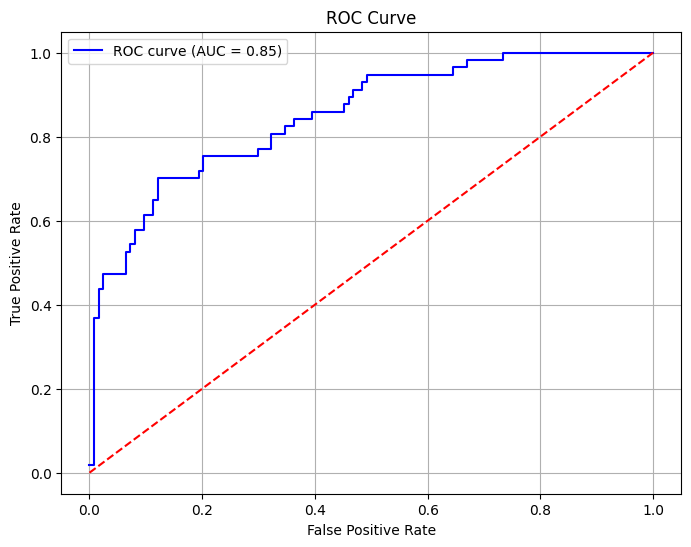

AUC: 0.8503
AUC for given model is : 0.8503


In [ ]:
auc = plot_roc_auc(new_df.Actual_Class,new_df.Predic_probability)
print("AUC for given model is :",np.round(auc,4))


### ROC Curve
The **Receiver Operating Characteristic (ROC) Curve** is a graphical representation of a classification model's performance across all possible classification thresholds. It plots:
- **True Positive Rate (TPR)** (also called Recall or Sensitivity) on the y-axis.
- **False Positive Rate (FPR)** on the x-axis.

The ROC curve shows the trade-off between the TPR and FPR as the classification threshold is varied.

### AUC
**Area Under the Curve (AUC)** is a single scalar value that represents the area under the ROC curve. It provides a measure of how well the model distinguishes between positive and negative classes.
- AUC ranges between 0 and 1.
  - AUC of **1** indicates perfect performance.
  - AUC of **0.5** indicates random guessing.
  
**In our case, the function we built to plot the ROC curve resulted in an AUC of approximately 0.8503, which can be considered a good model.**


## **Step 11: Calling previously defined functions**
Calling functions to the dataset to compute accuracy, precision, recall, specificity, and F1 Score.

In [ ]:
# Step 11
print('Accuracy    : ',accuracy(new_df['Actual_Class'],new_df['Predicted_Class']))
print('Precision   : ',precision(new_df['Actual_Class'],new_df['Predicted_Class']))
print('Sensitivity : ',sensitivity(new_df['Actual_Class'],new_df['Predicted_Class']))
print('Specificity : ',specificity(new_df['Actual_Class'],new_df['Predicted_Class']))
print('F1 Score.   : ', f1_score(new_df['Actual_Class'],new_df['Predicted_Class']))

Accuracy    :  0.8066
Precision   :  0.8438
Sensitivity :  0.4737
Specificity :  0.9597
F1 Score.   :  0.6067


## **Step 12: Comparison with scikit-learn**
Compare the outputs of your custom functions with `scikit-learn`'s pre-built functions, including confusion_matrix(), accuracy_score(), precision_score(), recall_score(), and f1_score().

In [ ]:
# Step 12: Compare with scikit-learn built-in functions
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Confusion matrix using scikit-learn
conf_matrix_sklearn = confusion_matrix(df['class'], df['scored.class'])
print("Confusion Matrix (scikit-learn):\n", conf_matrix_sklearn)

# Accuracy
accuracy_sklearn = accuracy_score(df['class'], df['scored.class'])
print(f"Accuracy (scikit-learn)    : {accuracy_sklearn:.4f}")

# Precision
precision_sklearn = precision_score(df['class'], df['scored.class'])
print(f"Precision (scikit-learn)   : {precision_sklearn:.4f}")

# Recall (Sensitivity)
recall_sklearn = recall_score(df['class'], df['scored.class'])
print(f"Recall (scikit-learn).     : {recall_sklearn:.4f}")

# Specificity
specificity_sklearn = recall_score(df['class'], df['scored.class'], pos_label=0)
print(f"Specificity (scikit-learn) : {specificity_sklearn:.4f}")

# F1 Score
f1_sklearn = f1_score(df['class'], df['scored.class'])
print(f"F1 Score (scikit-learn).   : {f1_sklearn:.4f}")


Confusion Matrix (scikit-learn):
 [[119   5]
 [ 30  27]]
Accuracy (scikit-learn)    : 0.8066
Precision (scikit-learn)   : 0.8438
Recall (scikit-learn).     : 0.4737
Specificity (scikit-learn) : 0.9597
F1 Score (scikit-learn).   : 0.6067


### Explanation:
The performance comparison between the custom functions and scikit-learn's built-in methods demonstrates that the results are highly consistent across the board. The key metrics—accuracy, precision, sensitivity, specificity, and F1 score—are nearly identical, confirming the correctness of the custom implementations.

- **Accuracy**: Both scikit-learn and the custom function yield an accuracy of **80.66%**, indicating the model’s correct prediction rate is identical across both methods.

- **Precision**: The precision metric is also identical at **84.38%**, meaning both approaches are equally effective at minimizing false positives.

- **Sensitivity/Recall**: Both methods report a sensitivity (recall) of **47.37%**, reflecting that the model is less effective at identifying true positives (i.e., detecting actual positives correctly), though this result is consistent across both implementations.

- **Specificity**: Specificity, which measures the ability to correctly identify true negatives, remains very high for both the custom and scikit-learn methods, at **95.97%**.

- **F1 Score**: The F1 Score is very similar between both methods, with scikit-learn reporting **0.6067** and the custom function returning **0.6067**, demonstrating consistent handling of the trade-off between precision and recall.

## **Step 13: ROC Curve and AUC with scikit-learn**
Using `scikit-learn`'s plot_roc_curve() and auc() functions to generate the ROC curve and AUC, then compare the results with your custom function.

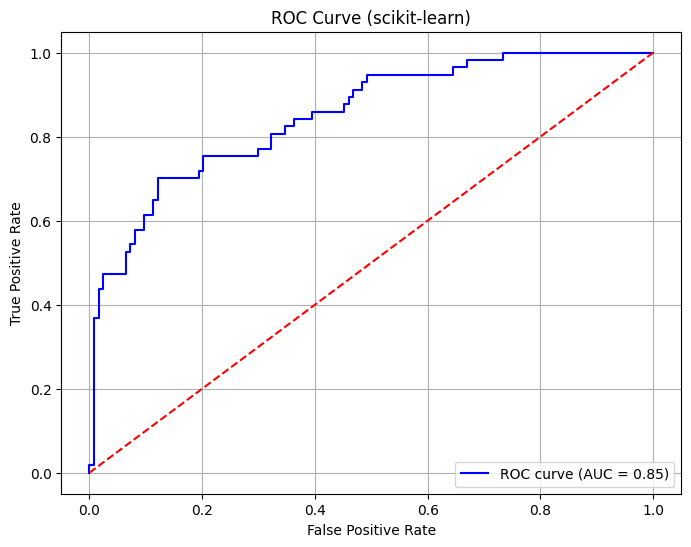

AUC (scikit-learn): 0.8503


In [ ]:
#Step 13
# ROC curve and AUC using scikit-learn
fpr_sklearn, tpr_sklearn, _ = roc_curve(df['class'], df['scored.probability'])
auc_score_sklearn = auc(fpr_sklearn, tpr_sklearn)

plt.figure(figsize=(8,6))
plt.plot(fpr_sklearn, tpr_sklearn, color='blue', label=f"ROC curve (AUC = {auc_score_sklearn:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (scikit-learn)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUC (scikit-learn): {auc_score_sklearn:.4f}")

### Explanation:
Both ROC curves (one generated via custom function and the other using scikit-learn’s `roc_curve` function) show a similar pattern, with an **AUC** (Area Under Curve) of **0.85** in both cases. This suggests that both methods provide equivalent insights into the model’s discriminatory power, and the custom function performs comparably to scikit-learn’s built-in function in terms of ROC plotting and AUC calculation.


### Conclusion
The custom-built functions have accurately replicated the performance metrics provided by scikit-learn, and the ROC/AUC analysis further strengthens this consistency. The slight visual differences between the ROC curves are negligible, and overall, the custom implementations prove to be both reliable and insightful.